In [389]:
from optimizer_supervised import Optimizer
from model import TransformerModel
from Hamiltonian import Ising

In [390]:
import numpy as np
import torch

In [391]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Set the device to GPU
    device = torch.device("cuda")
    print("GPU is available")
else:
    # Set the device to CPU
    device = torch.device("cpu")
    print("GPU is not available, using CPU")

# Example usage: Move a tensor to the selected device
x = torch.tensor([1, 2, 3])
x = x.to(device)

GPU is available


In [392]:
torch.set_default_tensor_type(
    torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
)

In [393]:
system_sizes = np.arange(8, 21, 2).reshape(-1, 1)
Hamiltonians = [Ising(size, periodic=True) for size in system_sizes]
param_dim = Hamiltonians[0].param_dim
embedding_size = 32
n_head = 8
n_hid = embedding_size
n_layers = 8
dropout = 0
minibatch = 10000

print("Sizes:", system_sizes)
print("Hamiltonians:", Hamiltonians)
print("Param dim:", param_dim)

Sizes: [[ 8]
 [10]
 [12]
 [14]
 [16]
 [18]
 [20]]
Hamiltonians: [<Hamiltonian.Ising object at 0x7820bc1781a0>, <Hamiltonian.Ising object at 0x7820b7ebba10>, <Hamiltonian.Ising object at 0x7820b7ebb230>, <Hamiltonian.Ising object at 0x7820b7eb9b20>, <Hamiltonian.Ising object at 0x7820b7eb8920>, <Hamiltonian.Ising object at 0x7820b7eba2a0>, <Hamiltonian.Ising object at 0x7820b7ebaf90>]
Param dim: 1


/home/spandan/Projects/tqs/Hamiltonian_utils.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  system_size = torch.tensor(system_size, dtype=torch.int64).reshape(-1)


In [394]:
model = TransformerModel(
    system_sizes,
    param_dim,
    embedding_size,
    n_head,
    n_hid,
    n_layers,
    dropout=dropout,
    minibatch=minibatch,
)

/home/spandan/anaconda3/envs/tqs2/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [395]:
param_range = None
point_of_interest = None
use_SR = False

In [396]:
import os

results_dir = "results"
paper_checkpoint_name = "ckpt_100000_Ising_32_8_8_0.ckpt"
paper_checkpoint_path = os.path.join(results_dir, paper_checkpoint_name)
checkpoint = torch.load(paper_checkpoint_path)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [397]:
system_size = torch.tensor([8])
param = torch.tensor([1])
model.set_param(system_size=system_size, param=param)

print(model.param)
print(model.system_size)

tensor([1])
tensor([8])


In [398]:
from model_utils import compute_psi

In [399]:
H = Hamiltonians[0]
basis = H.generate_basis()
symmetry = H.symmetry
log_amp, log_phase = compute_psi(model, basis, symmetry, check_duplicate=True)
print("Log_amp:", log_amp)
print("Log_phase:", log_phase)

Log_amp: tensor([-2.1137, -3.5027, -4.4336, -3.9902, -4.5765, -5.6316, -5.1819, -4.2135,
        -4.6142, -5.8947, -6.6331, -5.9672, -5.4408, -6.2229, -5.4676, -4.2820,
        -4.6142, -5.9484, -6.8263, -6.2895, -6.8024, -7.7209, -7.1557, -6.0572,
        -5.4993, -6.6536, -7.2448, -6.3879, -5.7524, -6.3659, -5.5080, -4.2135,
        -4.5765, -5.9277, -6.8401, -6.3442, -6.9357, -7.9223, -7.4311, -6.3879,
        -6.8024, -8.0052, -8.6767, -7.9029, -7.3727, -8.0406, -7.2319, -5.9672,
        -5.4408, -6.7056, -7.5316, -6.8723, -7.3727, -8.1548, -7.4967, -6.2895,
        -5.7524, -6.8063, -7.3226, -6.3442, -5.7299, -6.2410, -5.3427, -3.9902,
        -4.4336, -5.7966, -6.7178, -6.2410, -6.8401, -7.8525, -7.3771, -6.3659,
        -6.8263, -8.0641, -8.7695, -8.0406, -7.5316, -8.2460, -7.4612, -6.2229,
        -6.6331, -7.9239, -8.7695, -8.1548, -8.6767, -9.5091, -8.8908, -7.7209,
        -7.2448, -8.3303, -8.8690, -7.9223, -7.3226, -7.8525, -6.9741, -5.6316,
        -5.1819, -6.5007, -7.37

In [400]:
print(torch.tensor(H.generate_basis())[4])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])


/tmp/ipykernel_25272/715684954.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.tensor(H.generate_basis())[4])


It's quite nice that the phases are a periodic sequence:


In [401]:
amp = torch.sqrt(torch.exp(log_amp))
phase = torch.exp(log_phase)

print("Amplitude:", amp)
print("Phase:", phase)

Amplitude: tensor([0.3475, 0.1735, 0.1090, 0.1360, 0.1014, 0.0599, 0.0749, 0.1216, 0.0996,
        0.0525, 0.0363, 0.0506, 0.0658, 0.0445, 0.0650, 0.1175, 0.0996, 0.0511,
        0.0329, 0.0431, 0.0333, 0.0211, 0.0279, 0.0484, 0.0639, 0.0359, 0.0267,
        0.0410, 0.0563, 0.0415, 0.0637, 0.1216, 0.1014, 0.0516, 0.0327, 0.0419,
        0.0312, 0.0190, 0.0243, 0.0410, 0.0333, 0.0183, 0.0131, 0.0192, 0.0251,
        0.0179, 0.0269, 0.0506, 0.0658, 0.0350, 0.0231, 0.0322, 0.0251, 0.0170,
        0.0236, 0.0431, 0.0563, 0.0333, 0.0257, 0.0419, 0.0570, 0.0441, 0.0692,
        0.1360, 0.1090, 0.0551, 0.0348, 0.0441, 0.0327, 0.0197, 0.0250, 0.0415,
        0.0329, 0.0177, 0.0125, 0.0179, 0.0231, 0.0162, 0.0240, 0.0445, 0.0363,
        0.0190, 0.0125, 0.0170, 0.0131, 0.0086, 0.0117, 0.0211, 0.0267, 0.0155,
        0.0119, 0.0190, 0.0257, 0.0197, 0.0306, 0.0599, 0.0749, 0.0388, 0.0250,
        0.0333, 0.0243, 0.0155, 0.0204, 0.0359, 0.0279, 0.0158, 0.0117, 0.0183,
        0.0236, 0.0177, 0.027

In [402]:
psi_predicted = amp.mul(torch.exp(1j * phase))
print(psi_predicted)

tensor([ 0.2323+0.2585j, -0.1005-0.1415j, -0.0243-0.1062j,  0.0907+0.1014j,
        -0.0310-0.0966j,  0.0398+0.0447j,  0.0499+0.0559j, -0.0038-0.1216j,
        -0.0293-0.0951j,  0.0349+0.0392j,  0.0241+0.0271j,  0.0193-0.0468j,
         0.0438+0.0491j,  0.0413-0.0166j,  0.0399-0.0513j,  0.0782+0.0877j,
        -0.0293-0.0951j,  0.0340+0.0382j,  0.0219+0.0246j, -0.0052-0.0428j,
         0.0222+0.0249j,  0.0210-0.0015j,  0.0035-0.0277j,  0.0322+0.0361j,
         0.0426+0.0477j,  0.0028-0.0358j,  0.0173-0.0203j,  0.0273+0.0306j,
        -0.0339-0.0450j,  0.0276+0.0310j,  0.0424+0.0475j, -0.0038-0.1216j,
        -0.0310-0.0966j,  0.0343+0.0386j,  0.0217+0.0244j,  0.0133-0.0398j,
         0.0208+0.0232j,  0.0190+0.0012j, -0.0096-0.0224j,  0.0273+0.0306j,
         0.0222+0.0249j,  0.0157-0.0093j,  0.0088-0.0096j,  0.0128+0.0144j,
        -0.0023-0.0250j,  0.0119+0.0134j,  0.0179+0.0201j,  0.0193-0.0468j,
         0.0438+0.0491j,  0.0274-0.0217j, -0.0017-0.0231j,  0.0215+0.0240j,
        -0.0

In [403]:
energy, psi_true = H.calc_ground(param=1)
psi_true = torch.tensor(psi_true)
print(psi_true)

tensor([ 0.4591, -0.1292, -0.1292,  0.0774, -0.1292,  0.0404,  0.0774, -0.0607,
        -0.1292,  0.0378,  0.0404, -0.0274,  0.0774, -0.0274, -0.0607,  0.0564,
        -0.1292,  0.0375,  0.0378, -0.0246,  0.0404, -0.0137, -0.0274,  0.0247,
         0.0774, -0.0246, -0.0274,  0.0221, -0.0607,  0.0247,  0.0564, -0.0607,
        -0.1292,  0.0378,  0.0375, -0.0246,  0.0378, -0.0128, -0.0246,  0.0221,
         0.0404, -0.0128, -0.0137,  0.0110, -0.0274,  0.0113,  0.0247, -0.0274,
         0.0774, -0.0246, -0.0246,  0.0192, -0.0274,  0.0110,  0.0221, -0.0246,
        -0.0607,  0.0221,  0.0247, -0.0246,  0.0564, -0.0274, -0.0607,  0.0774,
        -0.1292,  0.0404,  0.0378, -0.0274,  0.0375, -0.0137, -0.0246,  0.0247,
         0.0378, -0.0128, -0.0128,  0.0113, -0.0246,  0.0110,  0.0221, -0.0274,
         0.0404, -0.0137, -0.0128,  0.0110, -0.0137,  0.0060,  0.0110, -0.0137,
        -0.0274,  0.0110,  0.0113, -0.0128,  0.0247, -0.0137, -0.0274,  0.0404,
         0.0774, -0.0274, -0.0246,  0.02

/tmp/ipykernel_25272/4156994520.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  psi_true = torch.tensor(psi_true)


Is it just a phase difference?


In [404]:
modulus = torch.abs(psi_predicted)
print(modulus)

tensor([0.3475, 0.1735, 0.1090, 0.1360, 0.1014, 0.0599, 0.0749, 0.1216, 0.0996,
        0.0525, 0.0363, 0.0506, 0.0658, 0.0445, 0.0650, 0.1175, 0.0996, 0.0511,
        0.0329, 0.0431, 0.0333, 0.0211, 0.0279, 0.0484, 0.0639, 0.0359, 0.0267,
        0.0410, 0.0563, 0.0415, 0.0637, 0.1216, 0.1014, 0.0516, 0.0327, 0.0419,
        0.0312, 0.0190, 0.0243, 0.0410, 0.0333, 0.0183, 0.0131, 0.0192, 0.0251,
        0.0179, 0.0269, 0.0506, 0.0658, 0.0350, 0.0231, 0.0322, 0.0251, 0.0170,
        0.0236, 0.0431, 0.0563, 0.0333, 0.0257, 0.0419, 0.0570, 0.0441, 0.0692,
        0.1360, 0.1090, 0.0551, 0.0348, 0.0441, 0.0327, 0.0197, 0.0250, 0.0415,
        0.0329, 0.0177, 0.0125, 0.0179, 0.0231, 0.0162, 0.0240, 0.0445, 0.0363,
        0.0190, 0.0125, 0.0170, 0.0131, 0.0086, 0.0117, 0.0211, 0.0267, 0.0155,
        0.0119, 0.0190, 0.0257, 0.0197, 0.0306, 0.0599, 0.0749, 0.0388, 0.0250,
        0.0333, 0.0243, 0.0155, 0.0204, 0.0359, 0.0279, 0.0158, 0.0117, 0.0183,
        0.0236, 0.0177, 0.0271, 0.0525, 

In [405]:
import pandas as pd
import matplotlib.pyplot as plt

array([[<Axes: title={'center': '0'}>]], dtype=object)

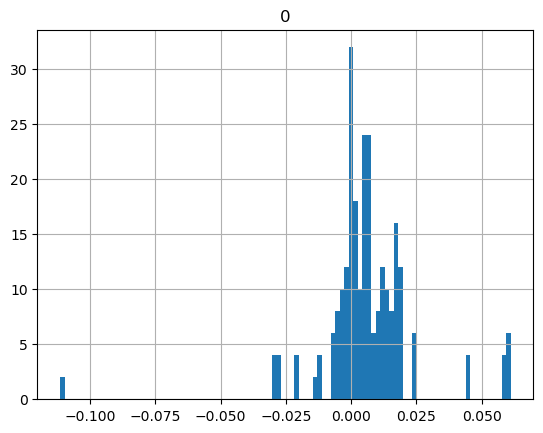

In [406]:
diffs = modulus - torch.abs(psi_true)
diffs = diffs.cpu().detach().numpy()
diffs_df = pd.DataFrame(diffs)
diffs_df.hist(bins=100)

Despite a few outliers, it seems that the amplitude difference between the predictions and true values is small


In [407]:
diffs_df.describe()

,0
count,256.000000
mean,0.005940
std,0.018785
min,-0.111538
25%,-0.000439
50%,0.004909
75%,0.013177
max,0.061184


Is the phase difference global?


In [408]:
phase_true = torch.angle(psi_true)
phase_predicted = torch.angle(psi_predicted)

phase_difference = phase_true - phase_predicted
print(phase_difference)

tensor([-0.8387,  5.3300,  4.9372, -0.8410,  5.0233, -0.8439, -0.8422,  4.7440,
         5.0111, -0.8428, -0.8432,  4.3220, -0.8421,  3.5229,  4.0514, -0.8423,
         5.0111, -0.8439, -0.8426,  4.8345, -0.8417,  3.2146,  4.5862, -0.8419,
        -0.8418,  4.6337,  4.0061, -0.8421,  5.3568, -0.8438, -0.8431,  4.7440,
         5.0233, -0.8443, -0.8436,  4.3898, -0.8413,  3.0774,  5.1189, -0.8421,
        -0.8417,  3.6774,  3.9697, -0.8440,  4.8035, -0.8445, -0.8437,  4.3220,
        -0.8421,  3.8117,  4.7842, -0.8406,  4.8035, -0.8439, -0.8426,  4.8345,
         5.3568, -0.8416, -0.8441,  4.3898, -0.8408,  3.6014,  3.8748, -0.8410,
         4.9372, -0.8452, -0.8444,  3.6014, -0.8436,  2.0543,  3.9428, -0.8438,
        -0.8426,  3.2331,  3.1969, -0.8445,  4.7842, -0.8439, -0.8444,  3.5229,
        -0.8432,  2.6392,  3.1969, -0.8439,  3.9697, -0.8454, -0.8445,  3.2146,
         4.0061, -0.8443, -0.8460,  3.0774, -0.8441,  2.0543,  2.3001, -0.8439,
        -0.8422,  3.1024,  3.9428, -0.84

Phase differences are not global.


In [409]:
print(phase_true)
print(phase_predicted)

tensor([0.0000, 3.1416, 3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416,
        0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 3.1416, 0.0000,
        0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416,
        0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416,
        0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000, 3.1416,
        0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 3.1416, 0.0000,
        0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416,
        0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000,
        0.0000, 3.1416, 3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 0.0000,
        3.1416, 3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000,
        0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416,
        0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416,
        0.0000, 3.1416, 3.1416, 0.0000, 

In [410]:
wrong_phase = torch.exp(log_phase)
print(wrong_phase)

tensor([  0.8387, 450.2009, 450.5938,   0.8410, 450.5076,   0.8439,   0.8422,
        450.7870, 450.5198,   0.8428,   0.8432, 451.2089,   0.8421, 452.0080,
        451.4796,   0.8423, 450.5198,   0.8439,   0.8426, 450.6964,   0.8417,
        452.3163, 450.9447,   0.8419,   0.8418, 450.8972, 451.5248,   0.8421,
        450.1741,   0.8438,   0.8431, 450.7870, 450.5076,   0.8443,   0.8436,
        451.1411,   0.8413, 452.4536, 450.4120,   0.8421,   0.8417, 451.8535,
        451.5612,   0.8440, 450.7274,   0.8445,   0.8437, 451.2089,   0.8421,
        451.7193, 450.7467,   0.8406, 450.7274,   0.8439,   0.8426, 450.6964,
        450.1741,   0.8416,   0.8441, 451.1411,   0.8408, 451.9296, 451.6562,
          0.8410, 450.5938,   0.8452,   0.8444, 451.9296,   0.8436, 453.4767,
        451.5881,   0.8438,   0.8426, 452.2978, 452.3340,   0.8445, 450.7467,
          0.8439,   0.8444, 452.0080,   0.8432, 452.8917, 452.3340,   0.8439,
        451.5612,   0.8454,   0.8445, 452.3163, 451.5248,   0.84

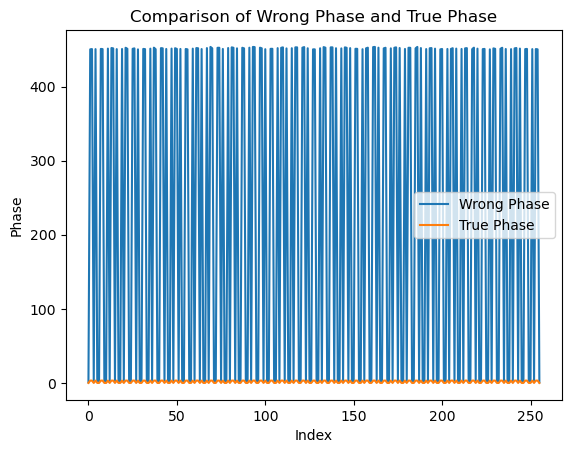

In [411]:
import matplotlib.pyplot as plt

plot_wrong = wrong_phase.cpu().detach().numpy()
plot_true = phase_true.cpu().detach().numpy()

x = range(len(wrong_phase))
plt.plot(x, plot_wrong, label="Wrong Phase")
plt.plot(x, plot_true, label="True Phase")

plt.xlabel("Index")
plt.ylabel("Phase")
plt.title("Comparison of Wrong Phase and True Phase")
plt.legend()
plt.show()

In [412]:
torch.div(phase_true, wrong_phase)

tensor([0.0000, 0.0070, 0.0070, 0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070,
        0.0000, 0.0000, 0.0070, 0.0000, 0.0070, 0.0070, 0.0000, 0.0070, 0.0000,
        0.0000, 0.0070, 0.0000, 0.0069, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070,
        0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070, 0.0000, 0.0000, 0.0070,
        0.0000, 0.0069, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070, 0.0000, 0.0070,
        0.0000, 0.0000, 0.0070, 0.0000, 0.0070, 0.0070, 0.0000, 0.0070, 0.0000,
        0.0000, 0.0070, 0.0070, 0.0000, 0.0000, 0.0070, 0.0000, 0.0070, 0.0070,
        0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0000, 0.0069, 0.0070, 0.0000,
        0.0000, 0.0069, 0.0069, 0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0000,
        0.0069, 0.0069, 0.0000, 0.0070, 0.0000, 0.0000, 0.0069, 0.0070, 0.0000,
        0.0000, 0.0069, 0.0000, 0.0069, 0.0069, 0.0000, 0.0000, 0.0069, 0.0070,
        0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070, 0.0000, 0.0000, 0.0070,
        0.0000, 0.0069, 0.0069, 0.0000, 

In [413]:
1 / 0.2886

3.465003465003465

In [414]:
phase_factor_diff = phase_predicted / phase_true
print(phase_factor_diff)

tensor([    inf, -0.6966, -0.5716,     inf, -0.5990,     inf,     inf, -0.5101,
        -0.5951,     inf,     inf, -0.3757,     inf, -0.1214, -0.2896,     inf,
        -0.5951,     inf,     inf, -0.5389,     inf, -0.0232, -0.4598,     inf,
            inf, -0.4750, -0.2752,     inf, -0.7051,     inf,     inf, -0.5101,
        -0.5990,     inf,     inf, -0.3973,     inf,  0.0204, -0.6294,     inf,
            inf, -0.1706, -0.2636,     inf, -0.5290,     inf,     inf, -0.3757,
            inf, -0.2133, -0.5229,     inf, -0.5290,     inf,     inf, -0.5389,
        -0.7051,     inf,     inf, -0.3973,     inf, -0.1464, -0.2334,     inf,
        -0.5716,     inf,     inf, -0.1464,     inf,  0.3461, -0.2550,     inf,
            inf, -0.0291, -0.0176,     inf, -0.5229,     inf,     inf, -0.1214,
            inf,  0.1599, -0.0176,     inf, -0.2636,     inf,     inf, -0.0232,
        -0.2752,     inf,     inf,  0.0204,     inf,  0.3461,  0.2679,     inf,
            inf,  0.0125, -0.2550,     i

In [415]:
mse = torch.mean((psi_predicted - psi_true) ** 2)
print("MSE:", mse)

MSE: tensor(-0.0005-0.0031j, dtype=torch.complex128, grad_fn=<MeanBackward0>)


In [416]:
real_imag = torch.view_as_real(psi_predicted)
psi_true_real_imag = torch.view_as_real(psi_true.to(torch.complex64))
print(real_imag)
print(psi_true_real_imag)

tensor([[ 0.2323,  0.2585],
        [-0.1005, -0.1415],
        [-0.0243, -0.1062],
        [ 0.0907,  0.1014],
        [-0.0310, -0.0966],
        [ 0.0398,  0.0447],
        [ 0.0499,  0.0559],
        [-0.0038, -0.1216],
        [-0.0293, -0.0951],
        [ 0.0349,  0.0392],
        [ 0.0241,  0.0271],
        [ 0.0193, -0.0468],
        [ 0.0438,  0.0491],
        [ 0.0413, -0.0166],
        [ 0.0399, -0.0513],
        [ 0.0782,  0.0877],
        [-0.0293, -0.0951],
        [ 0.0340,  0.0382],
        [ 0.0219,  0.0246],
        [-0.0052, -0.0428],
        [ 0.0222,  0.0249],
        [ 0.0210, -0.0015],
        [ 0.0035, -0.0277],
        [ 0.0322,  0.0361],
        [ 0.0426,  0.0477],
        [ 0.0028, -0.0358],
        [ 0.0173, -0.0203],
        [ 0.0273,  0.0306],
        [-0.0339, -0.0450],
        [ 0.0276,  0.0310],
        [ 0.0424,  0.0475],
        [-0.0038, -0.1216],
        [-0.0310, -0.0966],
        [ 0.0343,  0.0386],
        [ 0.0217,  0.0244],
        [ 0.0133, -0

In [417]:
ham = H.full_H(param=1)

In [418]:
mse = torch.mean((real_imag - psi_true_real_imag) ** 2)
print("MSE:", mse)

MSE: tensor(0.0022, grad_fn=<MeanBackward0>)


In [419]:
adam = torch.optim.Adam(model.parameters(), lr=0.01)
adam.zero_grad()
mse.backward(retain_graph=True)

Being able to produce a computational graph provides evidence that .backward and .step actually do full backpropagation with weight updates:


In [420]:
from torchviz import make_dot

In [421]:
# By user ucalyptus, from https://github.com/szagoruyko/pytorchviz/issues/41
def resize_graph(dot, size_per_element=0.15, min_size=12):
    """Resize the graph according to how much content it contains.
    Modify the graph in place.
    """
    # Get the approximate number of nodes and edges
    num_rows = len(dot.body)
    content_size = num_rows * size_per_element
    size = max(min_size, content_size)
    size_str = str(size) + "," + str(size)
    dot.graph_attr.update(size=size_str)

In [422]:
model.named_parameters()

<generator object Module.named_parameters at 0x7820c535df40>

In [423]:
torch.autograd.set_detect_anomaly(True)

In [424]:
# graph = make_dot(
#     mse, params=dict(model.named_parameters()), show_attrs=True, show_saved=True
# )
# resize_graph(graph, 0.7)
# graph.render("mse_full", format="png")

In [425]:
adam.step()

## Implementation in optimizer_supervised.py


In [426]:
optim = Optimizer(model, Hamiltonians, point_of_interest=point_of_interest)

In [427]:
loss = optim.calculate_mse_step(H, basis_batch=None, use_symmetry=True)
print("MSE:", loss)

MSE: tensor(0.0015, grad_fn=<MseLossBackward0>)


In [428]:
loss.backward(retain_graph=True)

## Generator for Points in Parameter Space

In [429]:
import itertools

In [430]:
def generate_parameter_range(start, end, step):
    """
    A simple generator returning the next value in a range of values
    whenever called, according to a step size.
    """
    value = start
    while value < end:
        yield value
        value += step


def generate_parameter_points(parameter_ranges, step_sizes, distribution=None):
    """
    Generate all possible combinations of parameter values for a model
    (i.e., the Cartesian product of values of parameters in a slice of parameter space)

    Parameters:
        parameter_ranges: torch.Tensor of shape (n_parameters, 2)
            The starting and ending values for each dimension of the slice of parameter space
        step_sizes: torch.Tensor of shape (n_parameters,)
            The step size for each dimension of the slice of parameter space
        distribution: N/A
            TODO: Not implemented

    """

    if distribution is not None:
        raise NotImplementedError(
            "Sampling using a custom distribution is not implemented yet."
        )

    # Every possible individual parameter value for each parameter, in order
    parameter_ranges = [
        generate_parameter_range(start.item(), end.item(), step.item())
        for (start, end), step in zip(parameter_ranges, step_sizes)
    ]

    return itertools.product(*parameter_ranges)

In [431]:
test_parameter_ranges = torch.tensor([[0, 2 * np.pi], [0, 10], [0.5, 1.5]])
test_step_sizes = torch.tensor([0.1, 1, 0.1])

print("test_parameter_ranges:\n", test_parameter_ranges)
print("test_step_sizes:\n", test_step_sizes)

test_parameter_ranges:
 tensor([[ 0.0000,  6.2832],
        [ 0.0000, 10.0000],
        [ 0.5000,  1.5000]])
test_step_sizes:
 tensor([0.1000, 1.0000, 0.1000])


In [432]:
for point in generate_parameter_points(test_parameter_ranges, test_step_sizes):
    print(torch.tensor(point))

tensor([0.0000, 0.0000, 0.5000])
tensor([0.0000, 0.0000, 0.6000])
tensor([0.0000, 0.0000, 0.7000])
tensor([0.0000, 0.0000, 0.8000])
tensor([0.0000, 0.0000, 0.9000])
tensor([0., 0., 1.])
tensor([0.0000, 0.0000, 1.1000])
tensor([0.0000, 0.0000, 1.2000])
tensor([0.0000, 0.0000, 1.3000])
tensor([0.0000, 0.0000, 1.4000])
tensor([0.0000, 1.0000, 0.5000])
tensor([0.0000, 1.0000, 0.6000])
tensor([0.0000, 1.0000, 0.7000])
tensor([0.0000, 1.0000, 0.8000])
tensor([0.0000, 1.0000, 0.9000])
tensor([0., 1., 1.])
tensor([0.0000, 1.0000, 1.1000])
tensor([0.0000, 1.0000, 1.2000])
tensor([0.0000, 1.0000, 1.3000])
tensor([0.0000, 1.0000, 1.4000])
tensor([0.0000, 2.0000, 0.5000])
tensor([0.0000, 2.0000, 0.6000])
tensor([0.0000, 2.0000, 0.7000])
tensor([0.0000, 2.0000, 0.8000])
tensor([0.0000, 2.0000, 0.9000])
tensor([0., 2., 1.])
tensor([0.0000, 2.0000, 1.1000])
tensor([0.0000, 2.0000, 1.2000])
tensor([0.0000, 2.0000, 1.3000])
tensor([0.0000, 2.0000, 1.4000])
tensor([0.0000, 3.0000, 0.5000])
tensor([0.000

In [433]:
torch.tensor(point).shape

torch.Size([3])

In [434]:
torch.tensor([[1], [2], [3]]).shape

torch.Size([3, 1])

In [435]:
print(H.system_size)

tensor([8])


See supervised_learning.ipynb for code that runs an MSE loss minimization loop.
